In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

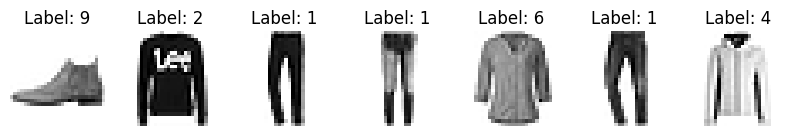

In [136]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(_, _), (images, labels) = fashion_mnist.load_data()

# Plot the first 5 images from the Fashion-MNIST dataset
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, label in zip(axes, images[:7], labels[:7]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

plt.show()

In [137]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [138]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [139]:
# Data Exploration
# Display basic information about the dataset
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])
print("Image shape:", x_train.shape[1:])

Number of training samples: 60000
Number of test samples: 10000
Image shape: (784,)


In [140]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [141]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

In [142]:
# Perform PCA for feature extraction
n_components = 50  # Choose the number of components
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
# Now, x_train_pca and x_test_pca contain the extracted features

In [143]:
# Visualize the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [144]:
# Print the cumulative variance to help decide the number of components
print("Cumulative Variance Ratio:")
print(cumulative_variance_ratio)

Cumulative Variance Ratio:
[0.22083259 0.3649772  0.41958827 0.47047454 0.5110229  0.5412177
 0.56869274 0.591829   0.6087552  0.6219355  0.6336364  0.64325994
 0.65232426 0.6609342  0.66836417 0.67566735 0.68228287 0.6885979
 0.69481725 0.70066    0.7058938  0.711005   0.71574026 0.720241
 0.724628   0.7287988  0.7327822  0.73668754 0.74046415 0.74419934
 0.74783045 0.7513466  0.7547069  0.758016   0.76129615 0.76447093
 0.76752275 0.77048826 0.7733349  0.77616495 0.7789205  0.7815999
 0.7842219  0.78676534 0.78923374 0.791625   0.79400116 0.79628026
 0.7984749  0.8006201 ]


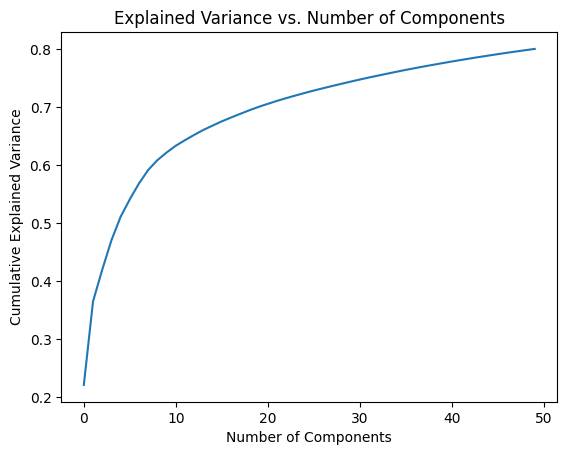

In [145]:
# You can also plot the explained variance ratio to visualize the information captured by each component
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

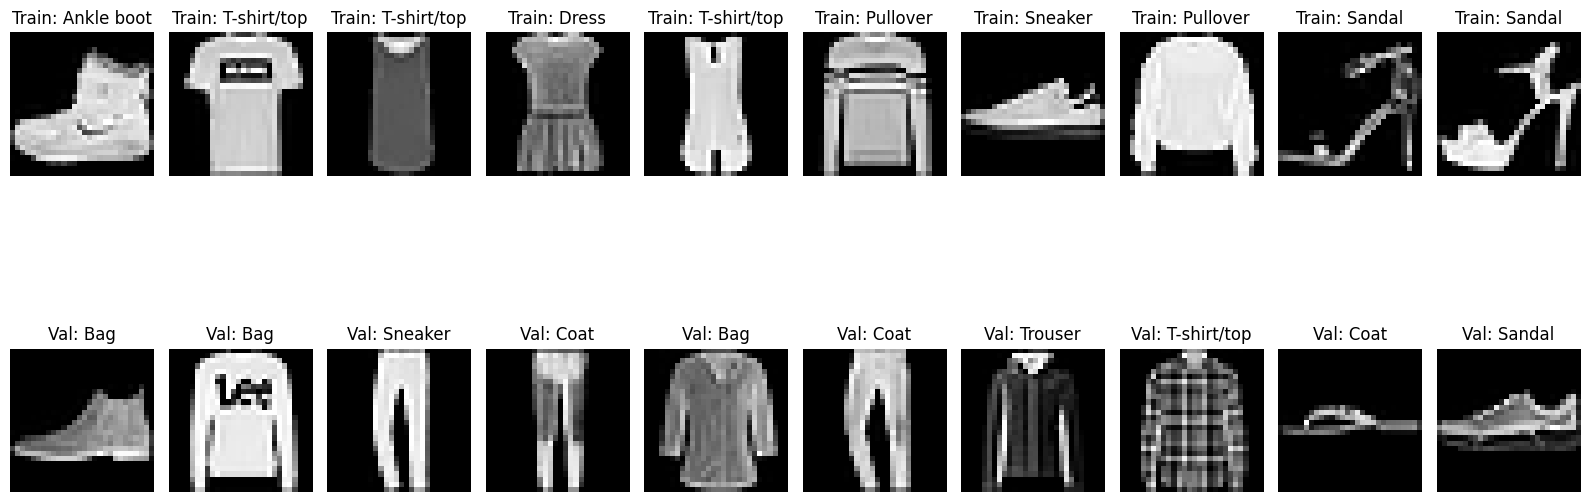

In [48]:
import matplotlib.pyplot as plt

# Map class labels to class names for better clarity
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Plot the first 20 images from the flattened datasets
plt.figure(figsize=(16, 8))

# Plot the first 10 images from the training set
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_train_flat[i].reshape(28, 28), cmap='gray')
    plt.title(f"Train: {class_names[y_train[i]]}")
    plt.axis('off')

# Plot the first 10 images from the validation set
for i in range(10):
    plt.subplot(2, 10, i + 11)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    plt.title(f"Val: {class_names[y_val[i]]}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [49]:
# Assuming x_train_pca is the feature-extracted training data
# and y_train is the corresponding labels
x_train, x_val, y_train, y_val = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=42)

**1- Logistic Regression Model**

In [51]:
# Create and train the model
model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg', max_iter=300)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(C=0.1, max_iter=300, solver='newton-cg')

In [70]:
# Make predictions on the validation set
y_pred = model.predict(x_val)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.12%


In [18]:
# You can also print other metrics such as classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1202
           1       0.98      0.96      0.97      1219
           2       0.75      0.71      0.73      1205
           3       0.82      0.87      0.85      1184
           4       0.72      0.76      0.74      1202
           5       0.93      0.94      0.93      1211
           6       0.61      0.58      0.60      1218
           7       0.91      0.91      0.91      1159
           8       0.95      0.93      0.94      1197
           9       0.94      0.95      0.94      1203

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


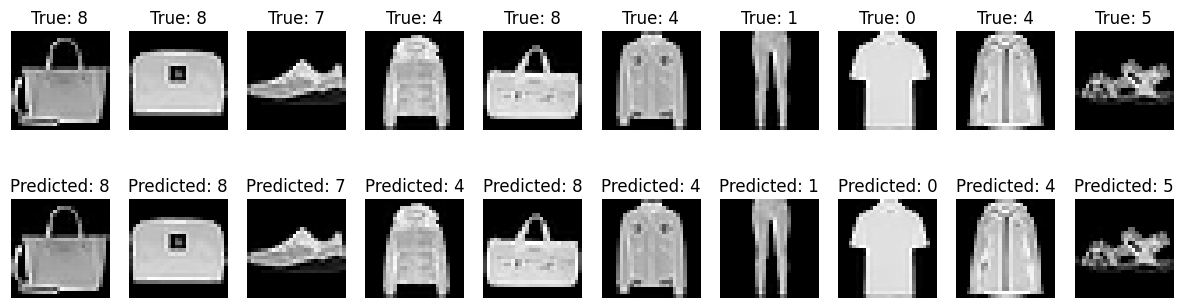

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train a Logistic Regression model
model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg', max_iter=300)
model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred[i]}')
    axes[1, i].axis('off')

plt.show()


**2- RandomForest Classifier Model**

In [21]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100 ,min_samples_split=2, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the validation set
y_pred_rf = rf_model.predict(x_val)

In [27]:
# Evaluate the Random Forest model with the best hyperparameters
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy : {accuracy_rf * 100:.2f}%")

Random Forest Accuracy with Best Hyperparameters: 86.13%


In [28]:
# Print other metrics such as classification report
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1202
           1       1.00      0.96      0.98      1219
           2       0.78      0.81      0.80      1205
           3       0.85      0.90      0.87      1184
           4       0.77      0.81      0.79      1202
           5       0.92      0.92      0.92      1211
           6       0.72      0.58      0.64      1218
           7       0.92      0.89      0.90      1159
           8       0.93      0.96      0.94      1197
           9       0.91      0.95      0.93      1203

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



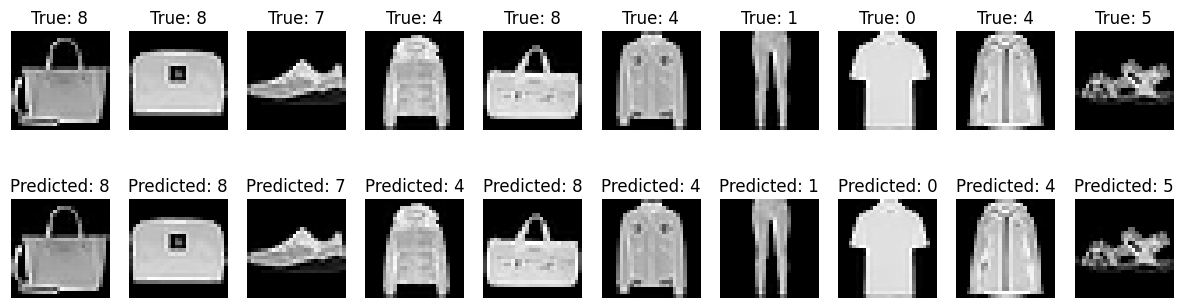

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred_rf[i]}')
    axes[1, i].axis('off')

plt.show()

**3- SVC Model**

In [31]:
# Create and train the Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', C=1.0,gamma=0.001, random_state=42)
svc_model.fit(x_train, y_train)

SVC(gamma=0.001, kernel='linear', random_state=42)

In [32]:
# Make predictions on the validation set
y_pred_svc = svc_model.predict(x_val)

In [33]:
# Evaluate the SVC model with the best hyperparameters
accuracy_svc = accuracy_score(y_val, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc * 100:.2f}%")

SVC Accuracy: 85.11%


In [34]:
# Print other metrics such as classification report
print("SVC Classification Report:")
print(classification_report(y_val, y_pred_svc))

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1202
           1       0.98      0.96      0.97      1219
           2       0.75      0.75      0.75      1205
           3       0.84      0.88      0.86      1184
           4       0.75      0.76      0.75      1202
           5       0.93      0.93      0.93      1211
           6       0.64      0.58      0.61      1218
           7       0.91      0.93      0.92      1159
           8       0.97      0.94      0.95      1197
           9       0.95      0.94      0.95      1203

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



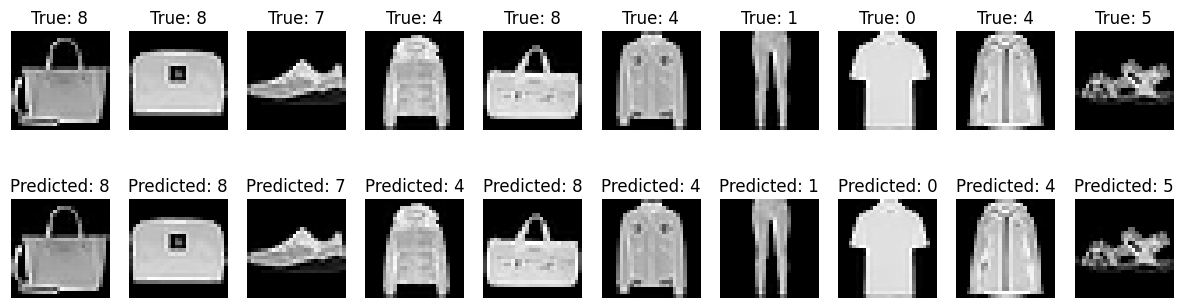

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train the Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', C=1.0,gamma=0.001, random_state=42)
svc_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_svc = svc_model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred_svc[i]}')
    axes[1, i].axis('off')

plt.show()


**4- Decision Tree Classifier Model**

In [52]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_split=2, random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
# Make predictions on the validation set
y_pred_dt = dt_model.predict(x_val)

In [54]:
# Evaluate the Decision Tree model with the best hyperparameters
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f"Decision Tree Accuracy : {accuracy_dt * 100:.2f}%")

Decision Tree Accuracy with Best Hyperparameters: 76.83%


In [55]:
# Print other metrics such as classification report
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1202
           1       0.95      0.94      0.95      1219
           2       0.66      0.66      0.66      1205
           3       0.79      0.78      0.78      1184
           4       0.64      0.66      0.65      1202
           5       0.83      0.84      0.83      1211
           6       0.50      0.50      0.50      1218
           7       0.84      0.82      0.83      1159
           8       0.89      0.90      0.89      1197
           9       0.88      0.87      0.88      1203

    accuracy                           0.77     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.77      0.77      0.77     12000



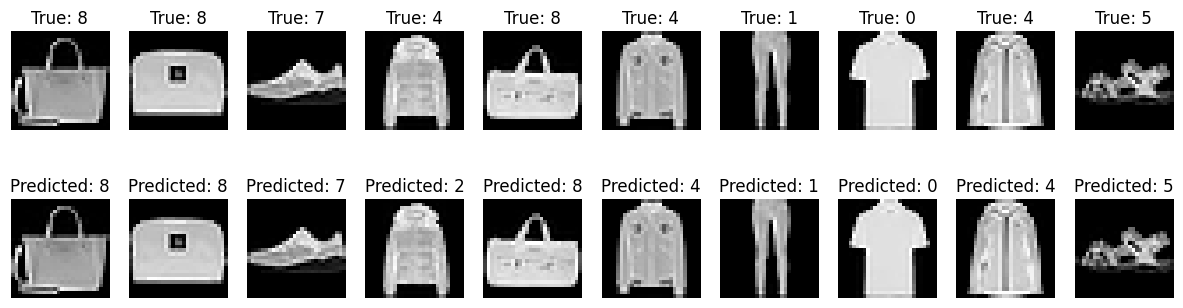

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_dt = dt_model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred_dt[i]}')
    axes[1, i].axis('off')

plt.show()


**5- XGBoost Classifier Model**

In [68]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=300, random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [73]:
# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(x_val)

In [74]:
# Evaluate the XGBoost model with the best hyperparameters
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy : {accuracy_xgb * 100:.2f}%")

XGBoost Accuracy : 87.96%


In [75]:
# Print other metrics such as classification report
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1202
           1       0.99      0.97      0.98      1219
           2       0.80      0.81      0.80      1205
           3       0.88      0.90      0.89      1184
           4       0.80      0.82      0.81      1202
           5       0.95      0.95      0.95      1211
           6       0.73      0.66      0.69      1218
           7       0.94      0.92      0.93      1159
           8       0.96      0.95      0.96      1197
           9       0.94      0.96      0.95      1203

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



#############################

**XGB save it for Deployment**

In [78]:
import joblib
joblib.dump(xgb_model, 'Model1.joblib')

model1= joblib.load('/content/Model1.joblib')

pred1 = model1.predict(x_val)

#############################

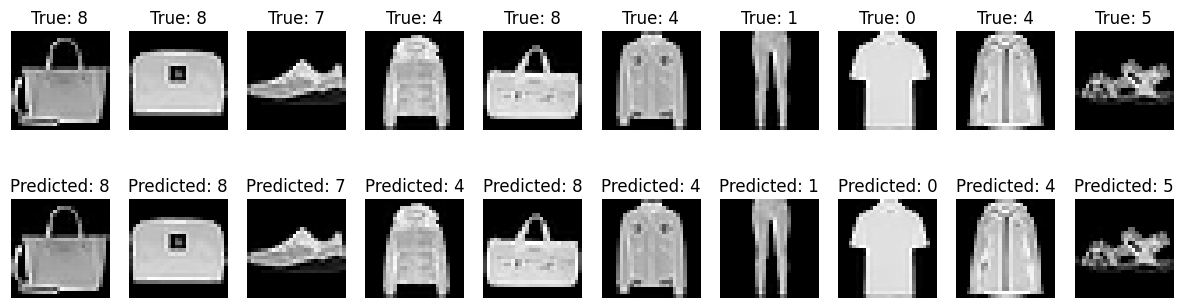

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred_xgb[i]}')
    axes[1, i].axis('off')

plt.show()

**6- KNN Classifier Model**

In [ ]:
# Define the parameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [79]:
# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights= 'uniform', p = 2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [80]:
# Make predictions on the validation set
y_pred_knn = knn_model.predict(x_val)

In [82]:
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"KNeighbors Accuracy : {accuracy_knn * 100:.2f}%")

KNeighbors Accuracy : 85.60%


In [83]:
# Print other metrics such as classification report
print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80      1202
           1       0.99      0.97      0.98      1219
           2       0.75      0.78      0.77      1205
           3       0.87      0.89      0.88      1184
           4       0.75      0.79      0.77      1202
           5       0.96      0.90      0.93      1211
           6       0.68      0.57      0.62      1218
           7       0.90      0.93      0.91      1159
           8       0.98      0.94      0.96      1197
           9       0.91      0.95      0.93      1203

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.85     12000



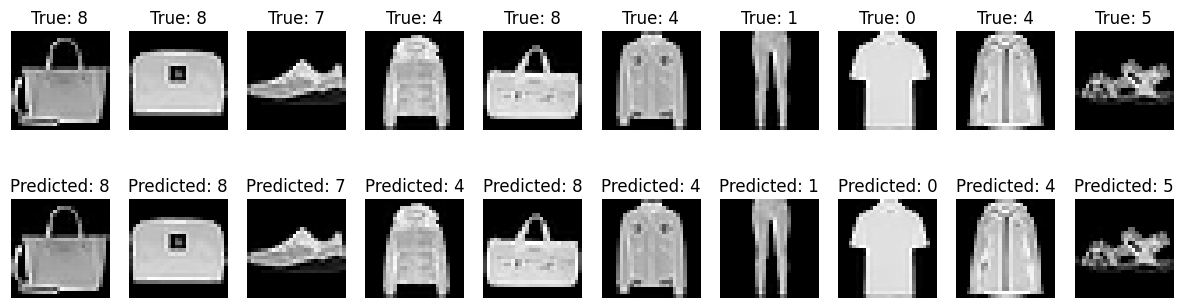

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_knn = knn_model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred_knn[i]}')
    axes[1, i].axis('off')

plt.show()

**7- Naive Bayes Model**

In [84]:
# Create and train the Naive Bayes model
nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(x_train, y_train)

GaussianNB()

In [85]:
# Make predictions on the validation set
y_pred_nb = model.predict(x_val)

In [86]:
# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

Naive Bayes Accuracy: 84.12%


In [87]:
# Print other metrics such as classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1202
           1       0.98      0.96      0.97      1219
           2       0.74      0.72      0.73      1205
           3       0.83      0.87      0.85      1184
           4       0.72      0.76      0.74      1202
           5       0.93      0.93      0.93      1211
           6       0.62      0.58      0.60      1218
           7       0.91      0.91      0.91      1159
           8       0.95      0.93      0.94      1197
           9       0.94      0.95      0.94      1203

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



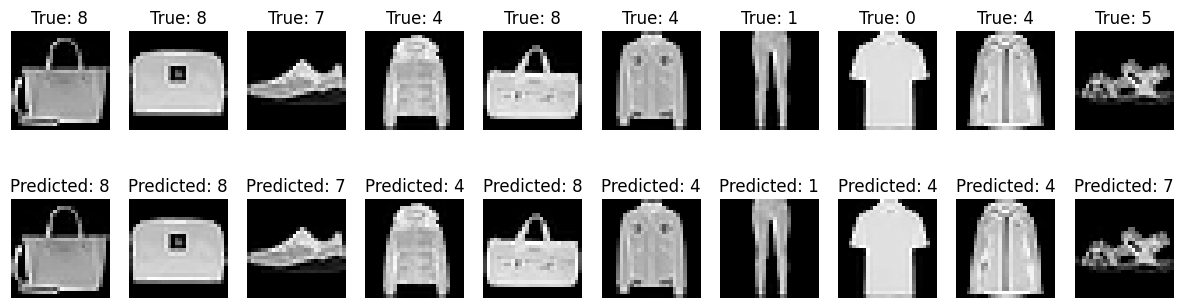

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data for training and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_nb = nb_model.predict(x_val)

# Plot the first 10 true and predicted images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):
    # Plot true images
    axes[0, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'True: {y_val[i]}')
    axes[0, i].axis('off')

    # Plot predicted images
    axes[1, i].imshow(x_val[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Predicted: {y_pred_nb[i]}')
    axes[1, i].axis('off')

plt.show()

**################################################**

**Hyperparameter Tuning for all Models**

In [99]:
# Define machine learning models
models = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier())
]


# Loop through each model
for name, model in models:
    # Create a pipeline for the model without hyperparameter tuning
    evaluation_pipeline = Pipeline([
        ('model', model)
    ])

     # Define the hyperparameters to tune
    if name == 'SVM':
         param_grid = {'model__C': [0.1, 1.0, 10.0], 'model__kernel': ['linear', 'rbf']}
    elif name == 'DecisionTree':
         param_grid = {'model__max_depth': [None, 5, 10]}
    elif name == 'LogisticRegression':
         param_grid = {}
    elif name == 'RandomForest':
         param_grid = {'model__n_estimators': [100, 200, 300]}
    elif name == 'KNN':
         param_grid = {'model__n_neighbors': [3, 5, 7]}
    elif name == 'NaiveBayes':
         param_grid = {}
    elif name == 'GradientBoosting':
         param_grid = {'learning_rate': [0.1, 0.01, 0.001]}

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(evaluation_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [107]:
# Print the results
print('Best Model:', name)
print('Best Parameters:', grid_search.best_params_)

Best Model: KNN
Best Parameters: {'model__n_neighbors': 7}


**###################################################**

**Pipeline for StandardScaler**

In [131]:
# Create a pipeline for standardizing the data
pro_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit and transform the training dataset
X_train_scaled = pro_pipeline.fit_transform(x_train_flat)

# Transform the test dataset
X_test_scaled = pro_pipeline.transform(x_test_flat)

**Pipeline for PCA Feature Extraction**

In [146]:
# Define the number of components for PCA
n_components = 50

# Create a pipeline for PCA without StandardScaler
pca_pipeline = Pipeline([
    ('pca', PCA(n_components=n_components))
])

# Fit and transform on the training dataset
x_train_pca = pca_pipeline.fit_transform(x_train_scaled.reshape(x_train_scaled.shape[0], -1))

# Transform on the test dataset
x_test_pca = pca_pipeline.transform(x_test_scaled.reshape(x_test_scaled.shape[0], -1))

# Now, x_train_pca and x_test_pca contain the extracted features

**Get All Together in Total_Pipeline**

In [147]:
# Create a pipeline for standardizing the data
pro_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create a pipeline for PCA without StandardScaler
pca_pipeline = Pipeline([
    ('pca', PCA(n_components=50))
])

# Combine the preprocessing pipelines using FeatureUnion
preprocessing_union = FeatureUnion([
    ('standardize', pro_pipeline),
    ('pca', pca_pipeline)
])


x_test_train_final = preprocessing_union.fit_transform(x_train)
x_test_final = preprocessing_union.transform(x_test)

In [149]:
x_test_train_final.shape,x_test_final.shape

((60000, 834), (10000, 834))

In [150]:
y_train.shape,y_test.shape

((60000,), (10000,))

**End of Project**